# [BETA] Posterior Approximation for a Ising like model for graph

We can express a  Two interactions dedicated to graphs as an exponential model :

$$P(y | \theta) = exp[\theta_{l0} t_{edge\_l0}(y) + \theta_{l1} t_{edge\_l1}(y) + \theta_{l10} t_{edge\_l1\neq l0}(y) ] $$



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf

from math import exp

In [8]:
def print_config(data):
        if not isinstance(data, list):
            for k, v in data.items():
                if k != 'posteriors':
                    print("{} => {}".format(k, v))

def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    if not isinstance(data, list):
        print_config(data)
        data = data['posteriors']
    theta_l0 = [d[0] for d in data]
    theta_l1 = [d[1] for d in data]
    theta_l10 = [d[2] for d in data]

    
    data_frame = pd.DataFrame({'theta_l0': theta_l0,
                               'theta_l1': theta_l1,
                               'theta_l10': theta_l10
                              })
    
    return data_frame


def summary(data):
    col_names = data.columns.values
    for i in [25,50,75]:
        print("========== Q{} ==========".format(i))
        for _, param_name in np.ndenumerate(col_names):
            q = np.percentile(data[param_name], i)
            print("Q{} for {} parameter {}".format(i, param_name, q))
    
    
def plot_marginals(data_abc, burn_in=0, by=1):
    
    col_names = data_abc.columns.values
    
    fig, axs = plt.subplots(len(col_names), 2, figsize=(14,25))
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        # Sample parameter
        params = data_abc[param_name].tolist()[burn_in::by]

        # Distribution
        sns.distplot(params, axlabel="{} distribution ABC".format(param_name), ax=axs[i, 0])

        # Path
        axs[i, 1].plot(range(len(params)), params)
        axs[i, 1].set(xlabel='iterations', ylabel='{} parameter ABC'.format(param_name))

def plot_dist(data, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    theta_l1 = data['l0'].tolist()[burn_in::by]
    theta_tl2 = data['l1'].tolist()[burn_in::by]
    theta_tl12 = data['l10'].tolist()[burn_in::by]
    
    data_sampled = pd.DataFrame({'theta_l0': theta_l1,
                                 'theta_l1': theta_l2,
                                 'theta_l10': theta_l12})
    
    g = sns.PairGrid(data_sampled, height=5)
    g = g.map_upper(plt.scatter)
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)


def autocor(data_abc, burn_in=0, by=1):

    col_names = data_abc.columns.values
    fig, axs = plt.subplots(len(col_names), 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        params = data_abc[param_name].tolist()[burn_in::by]
    
        plot_acf(params, ax=axs[i])
        axs[i].set_title("Autocorrelation for {} parameter".format(param_name))

### Experimentation #1
Basic Ising model dedicated to graph with interactions (repulsion)

In [9]:
FILE_NAME_1 = 'assets/exp1.json'
data1 = extract_from_file(FILE_NAME_1)

algo => abc_shadow
model => ising_model
theta0 => [1.0, 1.0, 1.0]
theta_perf => [1.0, 1.0, 1.0]
iters => 80000
n => 100
delta => [0.01, 0.01, 0.01]
y_obs => [22.512244897959185, 22.487755102040815, 198.33265306122448]


In [6]:
summary(data1)

========== Q25 ==========
Q25 for theta_l0 parameter -0.2912415377283787
Q25 for theta_l1 parameter 0.3714429680319564
Q25 for theta_l10 parameter 0.8998998649980575
========== Q50 ==========
Q50 for theta_l0 parameter 0.6799365423808932
Q50 for theta_l1 parameter 0.8800574100039278
Q50 for theta_l10 parameter 1.3309760299152522
========== Q75 ==========
Q75 for theta_l0 parameter 1.4878709963090193
Q75 for theta_l1 parameter 1.3785616122863988
Q75 for theta_l10 parameter 1.7347485584350966


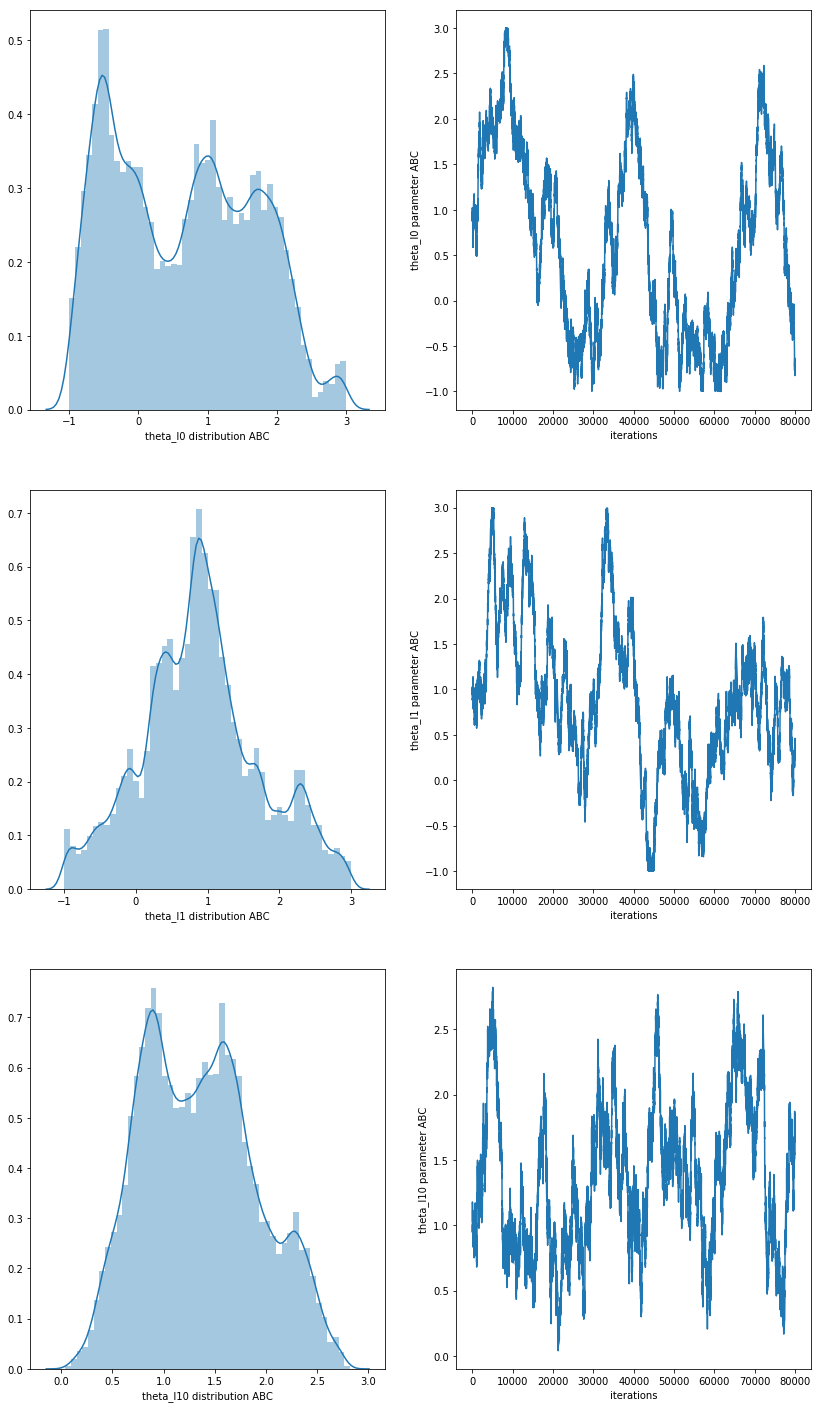

In [10]:
plot_marginals(data1, by=1)
# plt.savefig('post_interactions_marginals.pdf')

### Experimentation #2
Basic Ising model dedicated to graph without interaction (repulsion)

In [11]:
FILE_NAME_2 = 'assets/exp2.json'
data2 = extract_from_file(FILE_NAME_2)

algo => abc_shadow
model => ising_model
theta0 => [1.0, 1.0, 0.0]
theta_perf => [1.0, 1.0, 0.0]
iters => 80000
n => 100
delta => [0.01, 0.01, 0.01]
y_obs => [22.443877551020407, 22.556122448979593, 180.0]


In [12]:
summary(data2)

========== Q25 ==========
Q25 for theta_l0 parameter 0.6865179831773192
Q25 for theta_l1 parameter 0.6166208087719889
Q25 for theta_l10 parameter 0.0
========== Q50 ==========
Q50 for theta_l0 parameter 1.2678521125674842
Q50 for theta_l1 parameter 1.2991628257436107
Q50 for theta_l10 parameter 0.0
========== Q75 ==========
Q75 for theta_l0 parameter 1.9457238877038372
Q75 for theta_l1 parameter 1.966809504349534
Q75 for theta_l10 parameter 0.0


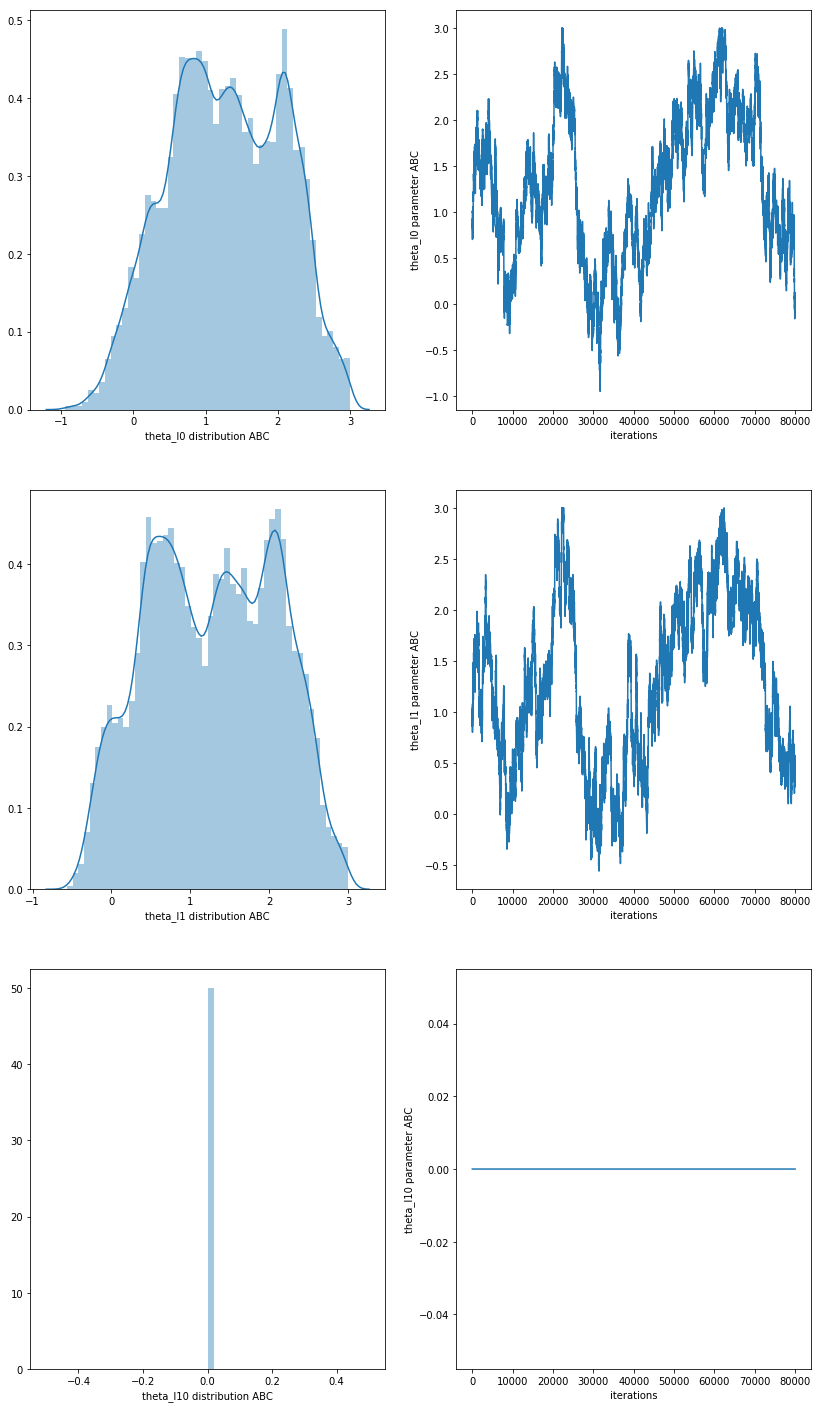

In [14]:
plot_marginals(data2, by=1)